ANR: **924823**

In [3]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

# Making Predictions

Boston housing dataset - collected by the U.S Census Service concerning housing in the area of Boston Mass.

## Task 1

Use the given coefficients and bias to predict yˆ: the median-value (by hand) for the feature vectors in the table above (Xtest). 

* Once we plug in the test instances to the given model (coefficients & bias), we calculate y(hat) as ~30.
* when we plug in the actual price & predicted price to the given RMSE calculation, we calculate RMSE as 6.


In [4]:
y_hat = 0.1080 * (0.00632) + 0.0464 * 18 + 0.0206 * 2.31 + 2.6867 * 0 -17.7666 * 0.538 + 3.8099 * 6.575 + 0.0007 * 65.2 -1.4756 * 4.0900 + 0.3061 * 1 -0.0123 * 296 -0.9527 *15.3 + 0.0093 * 396.90 -0.5247 * 4.98 + 36.4595

In [5]:
y_hat

30.012220259999992

In [6]:
import math
RMSE = math.sqrt(((24-30)**2/1))
RMSE

6.0

### *Linear Regression with Scikit-Learn*

In [7]:
new_columns = ["crime-rate", "zoned", "industry", "charles",
                "nitric-oxide", "rooms", "age", "employment-center",
                "radial-highways", "property-tax", "pupil-teach-ratio",
                "proportion-black-families", "poor-people", "median-value"]

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame.from_csv('/srv/data-mining/data/Housing/housing.csv',
                                                    index_col=None)

In [10]:
df.columns = new_columns

In [11]:
y = df["median-value"]

In [12]:
X = df.loc[:, df.columns != "median-value"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
list(zip(df.columns[:-1], lr.coef_))

[('crime-rate', -0.11305592398537927),
 ('zoned', 0.030110464145647508),
 ('industry', 0.040380720413344048),
 ('charles', 2.7844382035078947),
 ('nitric-oxide', -17.202633391781763),
 ('rooms', 4.4388351995130444),
 ('age', -0.0062963622109802253),
 ('employment-center', -1.4478653685307781),
 ('radial-highways', 0.26242973558508731),
 ('property-tax', -0.010646786275308504),
 ('pupil-teach-ratio', -0.91545624046807361),
 ('proportion-black-families', 0.01235133472996898),
 ('poor-people', -0.50857142444879277)]

In [17]:
from sklearn.metrics import mean_squared_error 
import numpy as np

In [18]:
y_pred = lr.predict(X_test)
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_model

4.9286021826653394

## Task 2

* Fit Linear Regression on the Boston Housing dataset, interpret the coefficients. What would these mean?  

Some of the coefficients are positive which means one unit increase for these variables will increase the outcome by these coefficients and negative ones the other way around, will decrease.

* How do we asses if the model has a) actually learned something, and b) will generalize well?  

a)The first model, gives a baseline first. So we did model fit and had a baseline rather than learning.  
b)We used the train data and now test data will allow to see performance since it's unseen data but it's suspicious to mention about generalizability yet because this dataset seems small.


*Further Analysis*

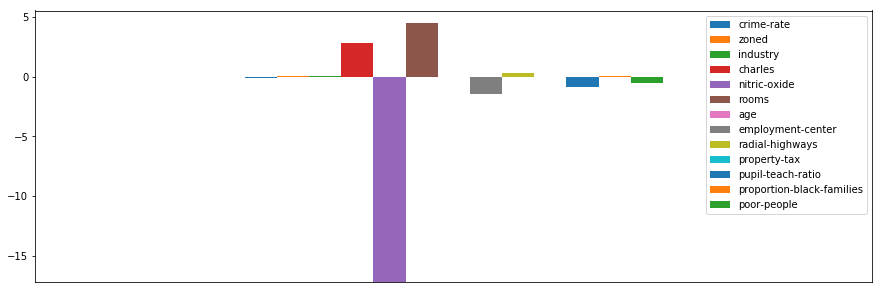

In [20]:
cdf = pd.DataFrame([list(lr.coef_)], columns=df.columns[:-1])
plt = cdf.plot(figsize=(15,5), kind='bar', legend=True)
plt.xaxis.set_visible(False)

In [21]:
#Baseline
df["median-value"].mean()

22.532806324110677

In [22]:
bl = [df["median-value"].mean()] * len(y_test)
bl

[22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324110677,
 22.532806324

In [23]:
rmse_bl = np.sqrt(mean_squared_error(y_test, bl))
rmse_bl

8.6269874114330118

## Task 3

* Interpret the baseline score and compare it to our previous RMSE score. How would you say the model is performing?  

As we just calcualted above, rmse_bl (baseline error) is 8.6 while the error of the model was 4.9. since rmse_bl>rmse_model, we can say that the model is learning some pattern.

* Looking at the error, and median-value, determine if the model is useful in practice.  

According to the mean value, it can be observed that the average house costs about 22500 dollar with a standard deviation of 9200 dollar.
y_pred mean is about 21250 dollar and y_test mean is about 21480 dollar.

In [24]:
df["median-value"] .mean()

22.532806324110677

In [25]:
df["median-value"].std()

9.1971040873798184

In [26]:
y_pred.mean()

21.25240910876817

In [27]:
y_test.mean()

21.488235294117644

(-0.4273207723732827, 7.0650415862543328e-24)

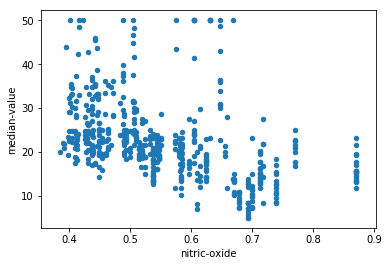

In [28]:
#Post-hoc Feature Analysis
from scipy.stats import pearsonr
df.plot(x='nitric-oxide', y='median-value', kind='scatter') 
pearsonr(df['nitric-oxide'], df['median-value'])

(0.69535994707153925, 2.4872288710082951e-74)

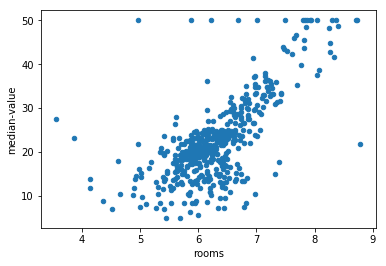

In [29]:
df.plot(x='rooms', y='median-value', kind='scatter')
pearsonr(df['rooms'], df['median-value'])

## Task 4

* Interpreting the plots (and more importantly the correlations), do these correspond to the regression coefficients?  

The correlation between rooms & median value is stronger that nitric-oxide & median values.

* What is the reason behind this? 

When we add all of the variables to the Linear Regression models, they multiple dimensions simultaneously. So, some variables are weighted lower.


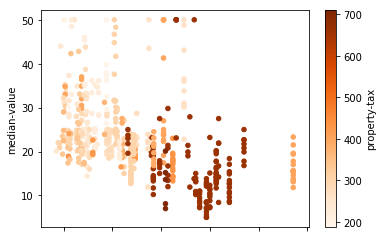

In [30]:
# More Plots
df.plot(x='nitric-oxide', y='median-value', c='property-tax',
                colormap='Oranges', kind='scatter')

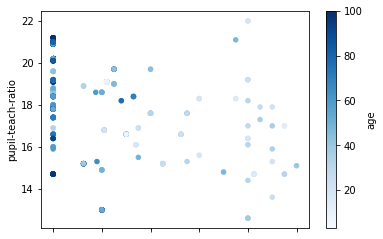

In [31]:
df.plot(x='zoned', y='pupil-teach-ratio', c='age',
                colormap='Blues', kind='scatter')

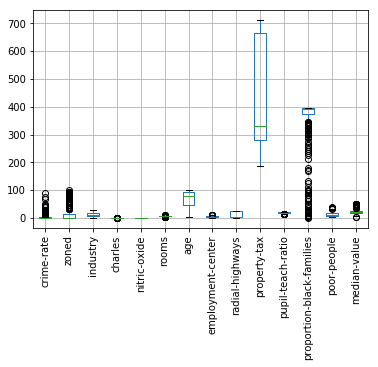

In [32]:
#Why Normalize?
df.boxplot(figsize=(20,5), rot=90)

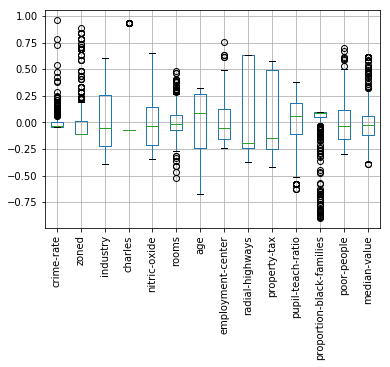

In [33]:
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.boxplot(figsize=(20,5), rot=90)

In [34]:
X = df_norm.loc[:, df_norm.columns != "median-value"]

In [35]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
y_pred = lr.predict(X_test)
rmse_norm = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_norm

4.9286021826653359

## Task 5

* From here on out you are on your own. Use the new normalized X to get a rmse_norm and compare it to the baseline and rmse_model. How much did we improve?

rmse_model and rmse_norm are exactly the same.
